In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import rotate

path = Path("spacio_training_2")
Path.mkdir(path / 'processed', exist_ok=True)
Path.mkdir(path / 'processed_with_corner_mask', exist_ok=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


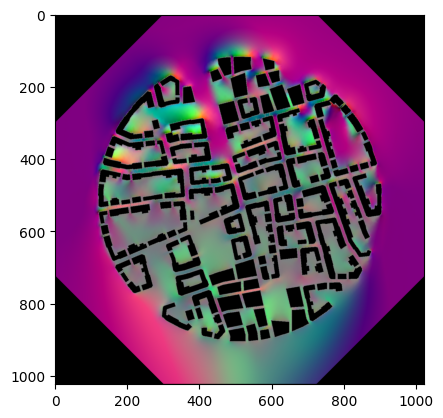

In [96]:
angle = 45
cnr_mask = np.load(path / 'processed_with_corner_mask/corner_mask.npy')
img = mpimg.imread(path/f"spacio_training_2/0_U_{angle}_4.png")

def rotate_image(img, angle, cnr_mask):

    theta = np.deg2rad(angle)
    mask = np.all(img <= [0.003921569,0.003921569,0.003921569], axis=-1)
    img -= 0.5
    img[:,:,0], img[:,:,1] = img[:,:,0] * np.cos(theta) + img[:,:,1] * -np.sin(theta), img[:,:,0] * np.sin(theta) + img[:,:,1] * np.cos(theta)
    img += 0.5
    img[mask] = [0,0,0]
    img[cnr_mask] = [0,0,0]
    img = rotate(img, angle=angle, reshape=False)

    return img

plt.imshow(rotate_image(img, angle, cnr_mask))

In [99]:
# For CFD results
angles = np.arange(0, 360, 45)

for sample in range(94):
    for angle in angles:
        img = mpimg.imread(path / f"spacio_training_2/{sample}_U_{angle}_4.png")
        img = rotate_image(img, angle, cnr_mask)
        np.save(path/ f"processed_with_corner_mask/{sample}_U_{angle}_4", img)        

In [88]:
# For geometries
for sample in range(94):
    for angle in angles:
        img = mpimg.imread(path/f"spacio_training_2/{sample}_geom.png")
        img = rotate(img, angle=angle, reshape=False)
        np.save(path/ f"processed_with_corner_mask/{sample}_{angle}_geom", img)   

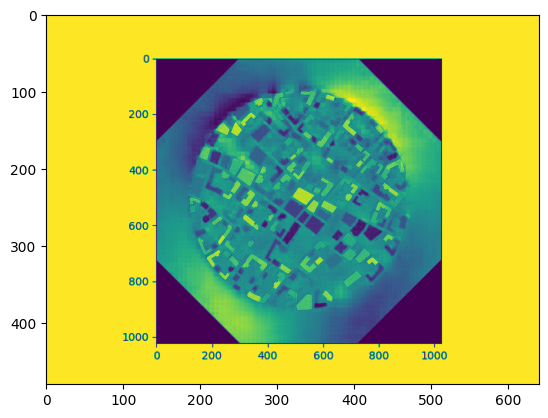

In [12]:
model = plt.imread(path/"validation_images/model_1.png")
plt.imshow(model[:,:,0])

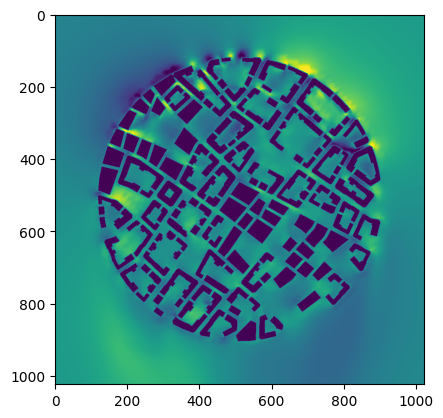

In [13]:
model = plt.imread(path/"spacio_training_2/93_U_0_0.png")
plt.imshow(model[:,:,0])